# GRIP : The Sparks Foundation
## Data Science and Business Analytics Intern

## Author : FAHMI MAROUANE

# Task 1: Prediction Using Supervised ML

Problem :
* Predict the percentage score of a student based on the number of study hours.
* The feature is the number of hours studied and the target value is the percentage score.
* This task can be solved using simple linear regression (we have just 2 variables).

Steps :
1. Importing required Libraries
2. Reading & exploting data
3. Scatter plot & Correlation btw variables
4. Preparing data for modeling
5. Spliting the data to train & test
6. Create a model and fit it
7. Get line equation
8. Plot a linear regression line on a scatter plot
9. Make the prediction on test data
10. Model evaluation
11. Prediction of a given value

### 1- Importing required Libraries

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2- Reading & Exploratory Data Analysis

In [2]:
#Reading data 
path_to_data = "data/student_scores.csv"
df = pd.read_csv(path_to_data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Shape of data
df.shape

(25, 2)

In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### As you can see this dataset has no null values

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 3- Scatter plot & Correlation btw variables

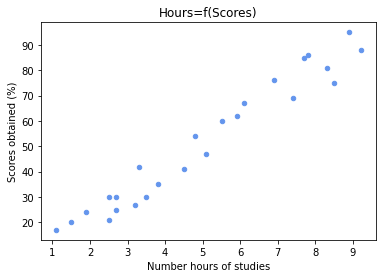

In [7]:
df.plot(kind='scatter', x='Hours', y = 'Scores', color='cornflowerblue')
plt.title("Hours=f(Scores)")
plt.xlabel("Number hours of studies")
plt.ylabel("Scores obtained (%)")
plt.show()

#### We can clearly see that there is a positive linear relation btw the two variables Hours & Scores.

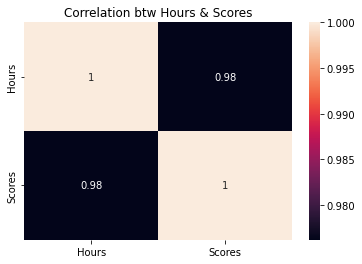

In [8]:
ax = sns.heatmap(df.corr(), annot=True).set(title='Correlation btw Hours & Scores')

### 4- Preparing data for modeling

In [9]:
# The inputs (regressors, X) 
X = df.iloc[:, :-1].values 
# The outputs (predictor, y)
y = df.iloc[:, 1].values

In [10]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (25, 1)
Shape of y: (25,)


### 5- Spliting the data to train & test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### 6- Create a model and fit it

In [12]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()
model_reg.fit(X_train,y_train)

LinearRegression()

### 7- Get line equation 

* intercept_ represents the coefficient 𝑏₀ 
* coef_ represents 𝑏₁ 
* y = 𝑏₀ + 𝑏₁*x

In [13]:
r_sq = model_reg.score(X, y)
print('coefficient of determination:', r_sq)
b0 = model_reg.intercept_
print('intercept:', b0)
b1 = model_reg.coef_
print('slope:', b1)

coefficient of determination: 0.9528345204324373
intercept: 2.826892353899737
slope: [9.68207815]


##### Interpretation :
if a student studies one hour more than they previously studied for an exam, he can expect to achieve an increase of 9.68% in the score achieved by the student previously.

### 8- Plot a linear regression line on a scatter plot

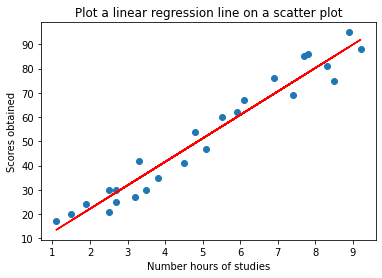

In [14]:
line_equation = b0 + b1*X
plt.scatter(X,y)
plt.plot(X, line_equation, color='red')
plt.title('Plot a linear regression line on a scatter plot')
plt.xlabel("Number hours of studies")
plt.ylabel("Scores obtained")
plt.show()

### 9- Make the prediction on test data

In [15]:
#y_pred = model_reg.intercept_ + model_reg.coef_ * X_test
y_pred = model_reg.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [16]:
actual_predicted = pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred})
actual_predicted

,Actual_value,Predicted_value
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


Text(0.5, 1.0, 'Predicted_value vs Actual_value')

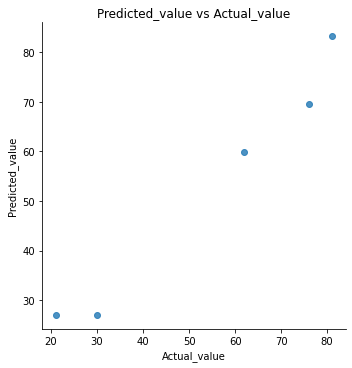

In [17]:
sns.lmplot(x='Actual_value', y='Predicted_value', data=actual_predicted, fit_reg=False)
plt.title("Predicted_value vs Actual_value")

##### Interpretation : 
Our model is not very precise, the predicted percentages are close to the actual ones

### 10- Model evaluation

In [18]:
from sklearn import metrics
from sklearn.metrics import r2_score

# MAE : the mean of the absolute value of the errors.
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
# MSE : the mean of the squared errors.
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
# RMSE : the square root of the mean of the squared errors.
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R2 Score
print("R2 Score:", r2_score(y_test,y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R2 Score: 0.9678055545167994


### 11- Prediction of a given value

#### what whould be the predicted score if a student studies for 9.25 hours/day ?

In [19]:
x_hours_pred = np.array([9.25]).reshape(1, 1)
y_score_pred = model_reg.predict(x_hours_pred)

print("If a student studies for {} hours per day he/she then will score {} % in exam.".format(x_hours_pred,y_score_pred))

If a student studies for [[9.25]] hours per day he/she then will score [92.38611528] % in exam.


In [20]:
# Thank you for watching :>